In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
import sys
import os
import xarray as xr
import math
import numpy as np
import matplotlib.pyplot as plt

In [8]:
sys.path.append('/home/cucchi/phd/devel/phd/')
DATA_FORCING_PATH = '/home/cucchi/phd/data/sim/lorenz96/rk4/DF_8_0.5_0/'

Load data without and with forcing

In [9]:
data_noforcing = xr.open_dataarray('/home/cucchi/phd/data/sim/lorenz96/rk4/CF_8/sim_lorenz96_rk4_CF_8_one_00000.nc')
data_forcing = []
for i in range(0, 10):
    data_forcing.append(xr.open_dataarray(
        os.path.join(DATA_FORCING_PATH,'sim_lorenz96_rk4_DF_8_0.5_0_one_{:05}.nc'.format(i))
    )

Compute observable (energy)

In [22]:
obs_noforcing = 0.5*(data_noforcing**2)
obs_forcing = []
for data in data_forcing:
    obs = 0.5*(data)**2
    obs.attrs = data.attrs
    obs_forcing.append(obs)

Compute average response

In [42]:
responses = []
for obs in obs_forcing:
    obs_noforcing_sel = obs_noforcing.sel(time_step = obs.time_step.values + obs.time_step_0_real)
    rescaled_time_steps = obs_noforcing_sel.time_step.values - obs_noforcing_sel.time_step.values[0]
    obs_noforcing_sel = obs_noforcing_sel.assign_coords(time_step=rescaled_time_steps)
    response = obs - obs_noforcing_sel
    responses.append(response)
responses = xr.concat(responses, dim='sim')
response_mean = responses.mean(dim='sim')

Plot average response

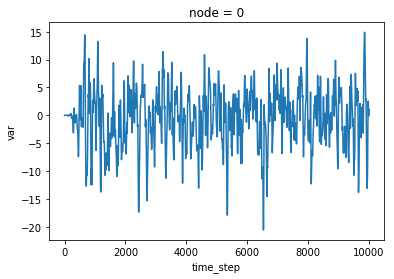

In [52]:
response_mean.plot()

Now, the average response to the delta force should be tge Green Function. Computing it's Fourier Transform, I should obtain the Susceptibility.

Padding and circular shift, for computational reasons

In [76]:
nt = response_mean.shape[0]
nfft = 2**(math.ceil(math.log2(abs(nt))))
response_mean_arr = response_mean.values[:,0]
response_mean_arr_extd = np.zeros(2*nfft)
response_mean_arr_extd[0:len(response_mean_arr)] = response_mean_arr
response_mean_arr_extd = np.roll(response_mean_arr_extd, nfft)

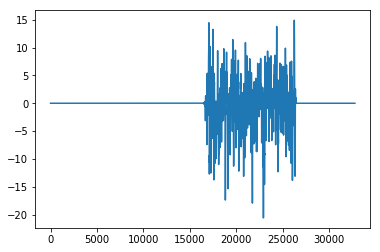

In [109]:
plt.plot(response_mean_arr_extd)